# Importación de los Módulos

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt
import splitfolders
import torchvision.transforms as transforms


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Exploración del conjunto de datos

In [89]:
#carpeta_general = 'starting-package/data x200/'
carpeta_general2 = 'starting-package/data x20/'
#splitfolders.ratio(carpeta_general, output="dataset", seed=42, ratio=(.6, .3, .1), group_prefix=None)# para este caso hemos particionado el conjunto de datos en 60% de entrenamiento, 30% validación y 10% para prueba. según los resultados de la validación se ve afectada a la hora de entrenar porque posee mucho pocos datos
splitfolders.ratio(carpeta_general2, output="dataset2", seed=42, ratio=(.7, .2, .1), group_prefix=None)# para este caso hemos particionado el conjunto de datos en 70% de entrenamiento, 20% validación y 10% para prueba. según los resultados de la validación se ve afectada a la hora de entrenar porque posee mucho pocos datos

Copying files: 1115 files [00:11, 99.29 files/s] 


In [4]:
directorio_principal = 'dataset'
print('Carpetas :', os.listdir(directorio_principal))
classes = os.listdir(directorio_principal + "/train")
print(len(classes))
print('200 classes :', classes)

Carpetas : ['test', 'train', 'val']
200
200 classes : ['001.Black_footed_Albatross', '002.Laysan_Albatross', '003.Sooty_Albatross', '004.Groove_billed_Ani', '005.Crested_Auklet', '006.Least_Auklet', '007.Parakeet_Auklet', '008.Rhinoceros_Auklet', '009.Brewer_Blackbird', '010.Red_winged_Blackbird', '011.Rusty_Blackbird', '012.Yellow_headed_Blackbird', '013.Bobolink', '014.Indigo_Bunting', '015.Lazuli_Bunting', '016.Painted_Bunting', '017.Cardinal', '018.Spotted_Catbird', '019.Gray_Catbird', '020.Yellow_breasted_Chat', '021.Eastern_Towhee', '022.Chuck_will_Widow', '023.Brandt_Cormorant', '024.Red_faced_Cormorant', '025.Pelagic_Cormorant', '026.Bronzed_Cowbird', '027.Shiny_Cowbird', '028.Brown_Creeper', '029.American_Crow', '030.Fish_Crow', '031.Black_billed_Cuckoo', '032.Mangrove_Cuckoo', '033.Yellow_billed_Cuckoo', '034.Gray_crowned_Rosy_Finch', '035.Purple_Finch', '036.Northern_Flicker', '037.Acadian_Flycatcher', '038.Great_Crested_Flycatcher', '039.Least_Flycatcher', '040.Olive_sided_

In [91]:
directorio_principal2 = 'dataset2'
print('Carpetas :', os.listdir(directorio_principal2))
classes = os.listdir(directorio_principal2 + "/train")
print(len(classes))
print('20 classes :', classes)

Carpetas : ['test', 'train', 'val']
20
20 classes : ['001.Black_footed_Albatross', '002.Laysan_Albatross', '003.Sooty_Albatross', '004.Groove_billed_Ani', '005.Crested_Auklet', '006.Least_Auklet', '007.Parakeet_Auklet', '008.Rhinoceros_Auklet', '009.Brewer_Blackbird', '010.Red_winged_Blackbird', '011.Rusty_Blackbird', '012.Yellow_headed_Blackbird', '013.Bobolink', '014.Indigo_Bunting', '015.Lazuli_Bunting', '016.Painted_Bunting', '017.Cardinal', '018.Spotted_Catbird', '019.Gray_Catbird', '020.Yellow_breasted_Chat']


In [5]:
transformation = transforms.Compose([transforms.Resize((250, 250)), # todas las imagenes van a tener un tamaño de pixel de 128x128
                                     transforms.ToTensor(), # se hizo la transformación de 0-255 el tono de color para 0-1 como tensor
                                    
                                    ])

In [121]:
train_dataset = ImageFolder(directorio_principal + '/train', transform=transformation)
print('Tamaño del conjunto de entrenamiento :', len(train_dataset))
val_dataset = ImageFolder(directorio_principal + '/val', transform=transformation)
print('Tamaño del conjunto de Validación :', len(val_dataset))
test_dataset = ImageFolder(directorio_principal + '/test', transform=transformation)
print('Tamaño del conjunto de Prueba :', len(test_dataset))


Tamaño del conjunto de entrenamiento : 7048
Tamaño del conjunto de Validación : 3504
Tamaño del conjunto de Prueba : 1236


In [122]:
train_dataset2 = ImageFolder(directorio_principal2 + '/train', transform=transformation)
print('Tamaño del conjunto de entrenamiento de 20 clases :', len(train_dataset))
val_dataset2 = ImageFolder(directorio_principal2 + '/val', transform=transformation)
print('Tamaño del conjunto de Validación de 20 clases:', len(val_dataset))
test_dataset2 = ImageFolder(directorio_principal2 + '/test', transform=transformation)
print('Tamaño del conjunto de Prueba de 20 clases :', len(test_dataset))

Tamaño del conjunto de entrenamiento de 20 clases : 7048
Tamaño del conjunto de Validación de 20 clases: 3504
Tamaño del conjunto de Prueba de 20 clases : 1236


In [9]:
img, label = train_dataset[0]
print(img.shape) # esta es el formato del conjunto de datos después de haber aplicado las transformaciones. 

torch.Size([3, 250, 250])


In [10]:
def ver_ejemplo(img, label):
    print('Clase: ', train_dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Clase:  001.Black_footed_Albatross (0)


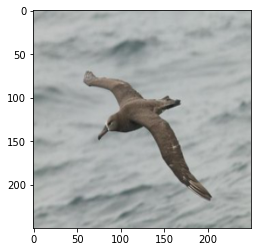

In [11]:
ver_ejemplo(img, label)

Clase:  001.Black_footed_Albatross (0)


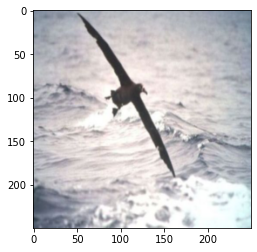

In [12]:
ver_ejemplo(*train_dataset[7])

Clase:  024.Red_faced_Cormorant (23)


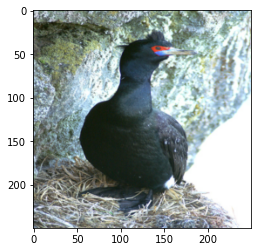

In [13]:
ver_ejemplo(*train_dataset[788])

In [14]:
batch_size = 256
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size,shuffle=True )
test_loader = DataLoader(test_dataset, batch_size, shuffle=True)

In [101]:
batch_size = 32
train_loader2 = DataLoader(train_dataset2, batch_size, shuffle=True)
val_loader2 = DataLoader(val_dataset2, batch_size,shuffle=True )
test_loader2 = DataLoader(test_dataset2, batch_size, shuffle=True)

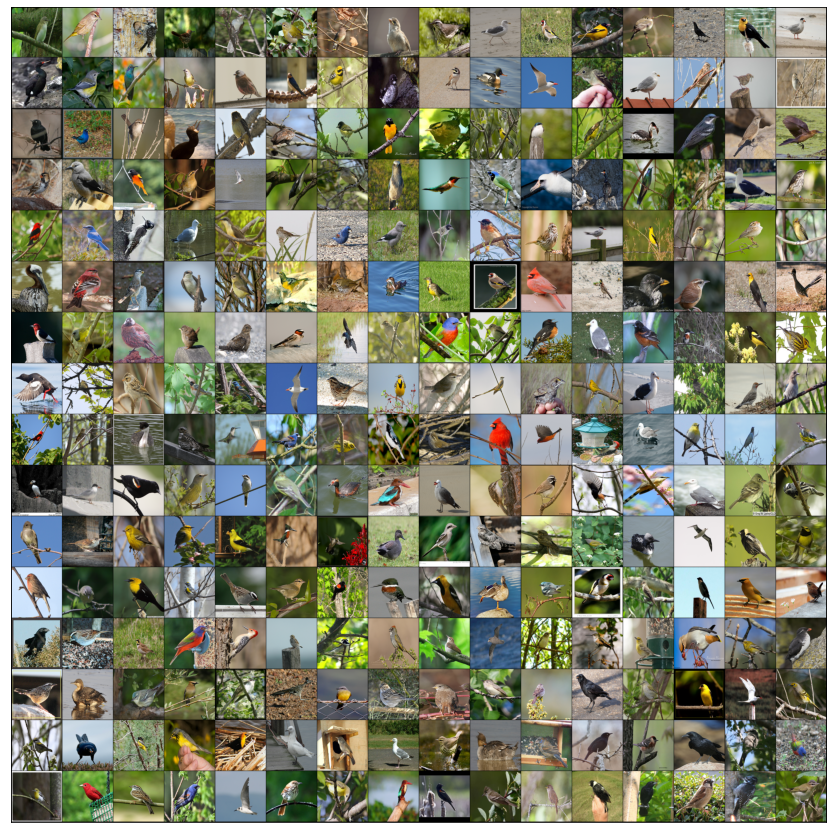

In [15]:
for images, labels in train_loader:
    #images,labels = images.to(device),labels.to(device)
    fig, ax = plt.subplots(figsize=(20, 15))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break

# Definición CNN 

In [16]:
device = get_default_device()
device # Para este caso como el experimento se está llevando a cabo con una máquina que no tiene GPU, el valor del device será CPU que es lo que tiene la máquina.

device(type='cpu')

In [19]:
for images, labels in train_loader:
    print('images.shape:', images.shape) # y este será el formato que obtendrá nuestro conjunto en la capa de salida, después de se aplicar sobre el modelo1 anteriormente definido
    break

images.shape: torch.Size([256, 3, 250, 250])


In [21]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        #images,labels = images.to(device),labels.to(device)
        out = self(images)                  # Prediciones
        loss = F.cross_entropy(out, labels) # calcular la función de pérdida
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        #images,labels = images.to(device),labels.to(device)
        out = self(images)                    # prediciones
        loss = F.cross_entropy(out, labels)   # calcular la función de pérdida
        acc = accuracy(out, labels)           # Calcular accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # tomar el promedio de las pérdidas en cada época 
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # promedio del accuracy
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

# Función de entrenamiento y de Evaluación

In [ ]:
def evaluate(model, test_loader):
    
    model.eval()
    outputs = [model.validation_step(batch) for batch in test_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    best_accuracy = 0.0
    for epoch in range(epochs):
        # entrenamiento 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validación
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)

        if result['val_acc']>best_accuracy:
            torch.save(model.state_dict(), 'Best_checkpoint.model')
            best_accuracy=result['val_acc']
    return history

# Modelo1 CNN

In [97]:
class Modelo1(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # Vamos a usar un modelo preentrenado 
        self.network = models.resnet18(weights='ResNet18_Weights.DEFAULT')
        # para este caso tenemos que reemplazar la ultima capa, debido a la cantida de clases que en nuestro caso son 200.
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, 20)
    
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))

In [98]:
modelo1 = Modelo1()
modelo1

Modelo1(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_run

Hiperparámetros

In [99]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [103]:
history1 = fit(num_epochs, lr, modelo1, train_loader2, val_loader2, opt_func)

Epoch [0], train_loss: 2.1851, val_loss: 2.4321, val_acc: 0.5655
Epoch [1], train_loss: 2.1654, val_loss: 2.4079, val_acc: 0.5848
Epoch [2], train_loss: 2.1392, val_loss: 2.3561, val_acc: 0.6682
Epoch [3], train_loss: 2.1303, val_loss: 2.4443, val_acc: 0.5506
Epoch [4], train_loss: 2.1293, val_loss: 2.2735, val_acc: 0.7634
Epoch [5], train_loss: 2.1208, val_loss: 2.3053, val_acc: 0.7173
Epoch [6], train_loss: 2.1301, val_loss: 2.3802, val_acc: 0.6592
Epoch [7], train_loss: 2.1342, val_loss: 2.4428, val_acc: 0.5610
Epoch [8], train_loss: 2.1226, val_loss: 2.4800, val_acc: 0.5357
Epoch [9], train_loss: 2.1115, val_loss: 2.2748, val_acc: 0.7783


Evaluar el modelo1

In [107]:
evaluate(modelo1, test_loader2)

{'val_loss': 2.311873435974121, 'val_acc': 0.7052801847457886}

# Analisis de los resultados Modelo1

In [108]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')

def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

def predict_image(img, model):
    # obtener la predición
    yb = model(img.unsqueeze(0))
    # Escoger el indice con mayor probabilidad
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    
    return test_dataset.classes[preds[0].item()]

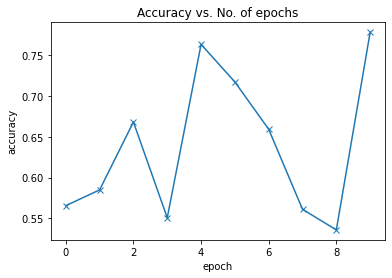

In [110]:
plot_accuracies(history)


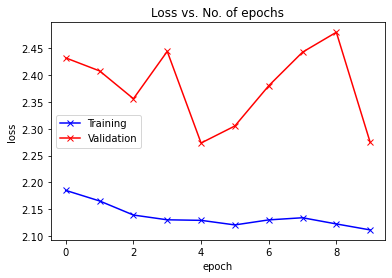

In [111]:
plot_losses(history)

CLASE ORIGINAL: 001.Black_footed_Albatross , PREDICTA: 001.Black_footed_Albatross


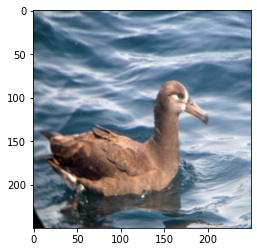

In [129]:
img, label = test_dataset2[0] # Se obtiene la etiqueta y la imagen.
plt.imshow(img.permute(1, 2, 0))
print('CLASE ORIGINAL:', test_dataset2.classes[label], ', PREDICTA:', predict_image(img, modelo1))

CLASE ORIGINAL: 012.Yellow_headed_Blackbird , PREDICTA: 012.Yellow_headed_Blackbird


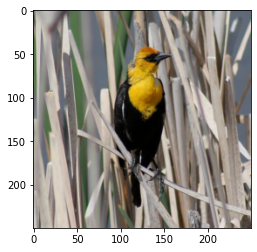

In [116]:
img, label = test_dataset2[67]
plt.imshow(img.permute(1, 2, 0))
print('CLASE ORIGINAL:', test_dataset2.classes[label], ', PREDICTA:', predict_image(img, modelo1))

CLASE ORIGINAL: 017.Cardinal , PREDICTA: 017.Cardinal


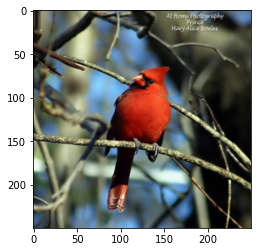

In [118]:
img, label = test_dataset2[100]
plt.imshow(img.permute(1, 2, 0))
print('CLASE ORIGINAL:', test_dataset2.classes[label], ', PREDICTA:', predict_image(img, modelo1))

CLASE ORIGINAL: 020.Yellow_breasted_Chat , PREDICTA: 012.Yellow_headed_Blackbird


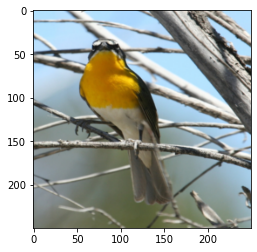

In [128]:
img, label = test_dataset2[124]
plt.imshow(img.permute(1, 2, 0))
print('CLASE ORIGINAL:', test_dataset2.classes[label], ', PREDICTA:', predict_image(img, modelo1))

Se puede observar que este es el último valor de la clase sobre el conjunto de prueba, en caso de intentar obtener un clase en un indice acima de 124 nos dará un error que esta fuera del rango visto que solo tenemos 20 clases por predecir

# Modelo2 CNN

In [22]:
class Modelo2(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # Vamos a usar un modelo preentrenado 
        self.network = models.resnet18(weights='ResNet18_Weights.DEFAULT')
        # para este caso tenemos que reemplazar la ultima capa, debido a la cantida de clases que en nuestro caso son 200.
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, 200)
    
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))

In [23]:
modelo2 = Modelo2()
modelo2

Modelo2(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_run

Em este paso se puede observar como la herramienta Dataloader nos permite cambiar el formato de la imagen de 4 dimensiones para 2 dimensiones gracias a la arquitectura de la red que define una salida de un eslote (batch) de 256 de la cantidad de clase que es 200. En este caso podemos ver la representación del tensor de la primera imagen del nuestro conjunto de datos de entrenamiento.

In [24]:
for images, labels in train_loader:
    print('images.shape:', images.shape)
    out = modelo2(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([256, 3, 250, 250])
out.shape: torch.Size([256, 200])
out[0]: tensor([0.5646, 0.2570, 0.6791, 0.5189, 0.4539, 0.5328, 0.6661, 0.4168, 0.3667,
        0.3145, 0.3935, 0.6586, 0.3680, 0.4379, 0.4767, 0.3351, 0.5595, 0.4201,
        0.4268, 0.5533, 0.5148, 0.6653, 0.3967, 0.1494, 0.5450, 0.5197, 0.4201,
        0.3801, 0.2457, 0.7794, 0.4906, 0.5901, 0.4039, 0.4589, 0.2887, 0.6364,
        0.3513, 0.5242, 0.5382, 0.3663, 0.4485, 0.6576, 0.5555, 0.1574, 0.4497,
        0.3604, 0.3505, 0.7720, 0.3555, 0.7474, 0.4372, 0.6583, 0.3996, 0.2203,
        0.3510, 0.5880, 0.7746, 0.4813, 0.3805, 0.3775, 0.6285, 0.4652, 0.4470,
        0.6279, 0.5780, 0.8908, 0.6091, 0.2482, 0.4296, 0.5699, 0.4392, 0.3022,
        0.4989, 0.5303, 0.6313, 0.6237, 0.4499, 0.3627, 0.5224, 0.6428, 0.3314,
        0.2939, 0.3270, 0.2812, 0.5111, 0.6361, 0.2833, 0.6242, 0.3493, 0.4899,
        0.5268, 0.4877, 0.4777, 0.5909, 0.4761, 0.8135, 0.2703, 0.7023, 0.3242,
        0.5996, 0.6671, 0.4843, 0

Hiperparámetros modificables

In [104]:
num_epochs = 256
opt_func = torch.optim.Adam
lr = 0.001

entrenar el modelo

In [27]:
history = fit(num_epochs, lr, modelo2, train_loader, val_loader, opt_func)

Epoch [0], train_loss: 4.9367, val_loss: 4.8298, val_acc: 0.1465
Epoch [1], train_loss: 4.5561, val_loss: 4.6691, val_acc: 0.3023
Epoch [2], train_loss: 4.4516, val_loss: 4.5528, val_acc: 0.4338
Epoch [3], train_loss: 4.4025, val_loss: 4.5805, val_acc: 0.4243
Epoch [4], train_loss: 4.3752, val_loss: 4.5332, val_acc: 0.5102
Epoch [5], train_loss: 4.3592, val_loss: 4.5510, val_acc: 0.4935
Epoch [6], train_loss: 4.3478, val_loss: 4.5419, val_acc: 0.5183
Epoch [7], train_loss: 4.3388, val_loss: 4.5478, val_acc: 0.5738
Epoch [8], train_loss: 4.3328, val_loss: 4.5516, val_acc: 0.5791
Epoch [9], train_loss: 4.3301, val_loss: 4.5719, val_acc: 0.5730


Resultado del entrenamiento con el mejor val_acc con valor de 0.5791 en la epoca 9

# Analisis de los resultados Modelo2

In [28]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')

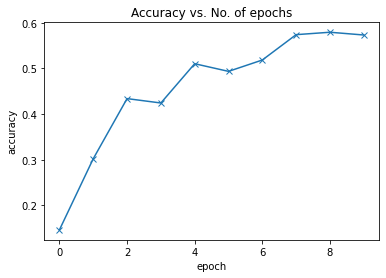

In [29]:
plot_accuracies(history)

In [30]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

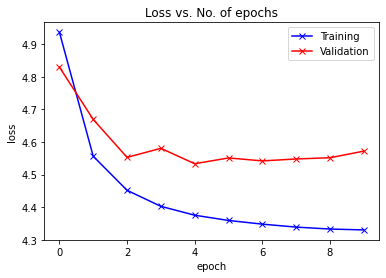

In [31]:
plot_losses(history)

In [42]:
evaluate(modelo2, test_loader)

{'val_loss': 4.556708335876465, 'val_acc': 0.5715065002441406}

Predecir una imagen

In [69]:
def predict_image(img, model):
    # obtener la predición
    yb = model(img.unsqueeze(0))
    # Escoger el indice con mayor probabilidad
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    
    return test_dataset.classes[preds[0].item()]

CLASE ORIGINAL: 001.Black_footed_Albatross , PREDICTA: 001.Black_footed_Albatross


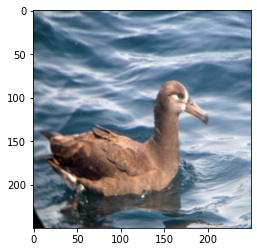

In [79]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('CLASE ORIGINAL:', test_dataset.classes[label], ', PREDICTA:', predict_image(img, modelo2))

Clase Original: 012.Yellow_headed_Blackbird , Predita: 012.Yellow_headed_Blackbird


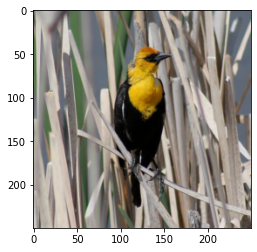

In [80]:
img, label = test_dataset[67]
plt.imshow(img.permute(1, 2, 0))
print('Clase Original:', test_dataset.classes[label], ', Predita:', predict_image(img, modelo2))

Clase Original: 128.Seaside_Sparrow , Predita: 128.Seaside_Sparrow


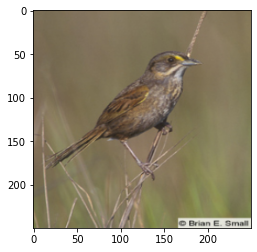

In [81]:
img, label = test_dataset[789] 
plt.imshow(img.permute(1, 2, 0))
print('Clase Original:', test_dataset.classes[label], ', Predita:', predict_image(img, modelo2))

Clase Original: 056.Pine_Grosbeak , Predita: 056.Pine_Grosbeak


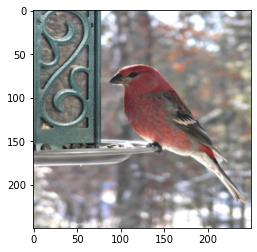

In [82]:
img, label = test_dataset[345]
plt.imshow(img.permute(1, 2, 0))
print('Clase Original:', test_dataset.classes[label], ', Predita:', predict_image(img, modelo2))

Clase Original: 001.Black_footed_Albatross , Predita: 003.Sooty_Albatross


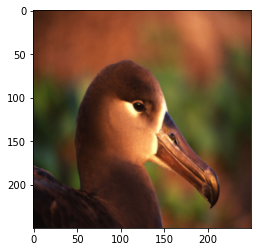

In [83]:
img, label = test_dataset[3]
plt.imshow(img.permute(1, 2, 0))
print('Clase Original:', test_dataset.classes[label], ', Predita:', predict_image(img, modelo2))

Clase Original: 141.Artic_Tern , Predita: 141.Artic_Tern


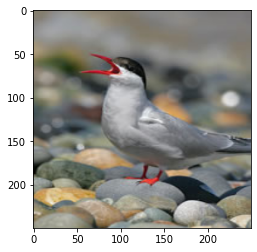

In [84]:
img, label = test_dataset[864     ]
plt.imshow(img.permute(1, 2, 0))
print('Clase Original:', test_dataset.classes[label], ', Predita:', predict_image(img, modelo2))

Clase Original: 136.Barn_Swallow , Predita: 136.Barn_Swallow


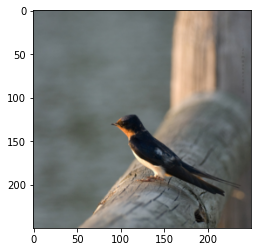

In [78]:
  jj ajj 
     img, label = test_dataset[834
   ]
plt.imshow(img.permute(1, 2, 0))
print('Clase Original:', test_dataset.classes[label], ', Predita:', predict_image(img, modelo2))